# NOAA Precipitation Visualization - Stehekin, WA

## Dependencies

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## API Pull

In [2]:
# api pull from NOAA of Stehekin weather station precipitation data

url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
headers = {"token": "qwmteOhCQypbxqnKZfwSNBDZAUhHywgA"}
params = {
    "datasetid": "GHCND",
    "stationid": "GHCND:USC00458059",
    "startdate": "2025-12-01",
    "enddate": "2025-12-31",
    "limit": 1000
}

response = requests.get(url, headers=headers, params=params)
data = response.json()

## Data Processing

In [3]:
# convert to pandas dataframe
daily_data = data.get("results", [])  
df = pd.DataFrame(daily_data)
cleaned_df = df[df['datatype'] == 'PRCP']
cleaned_df['value'] = cleaned_df['value'] / 10
cleaned_df['date'] = pd.to_datetime(cleaned_df['date']).dt.date


/var/folders/rj/g1dwlppj5f33mzwsfvn7tr9m0000gn/T/ipykernel_2652/815064795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['value'] = cleaned_df['value'] / 10
/var/folders/rj/g1dwlppj5f33mzwsfvn7tr9m0000gn/T/ipykernel_2652/815064795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date'] = pd.to_datetime(cleaned_df['date']).dt.date


## Plotting

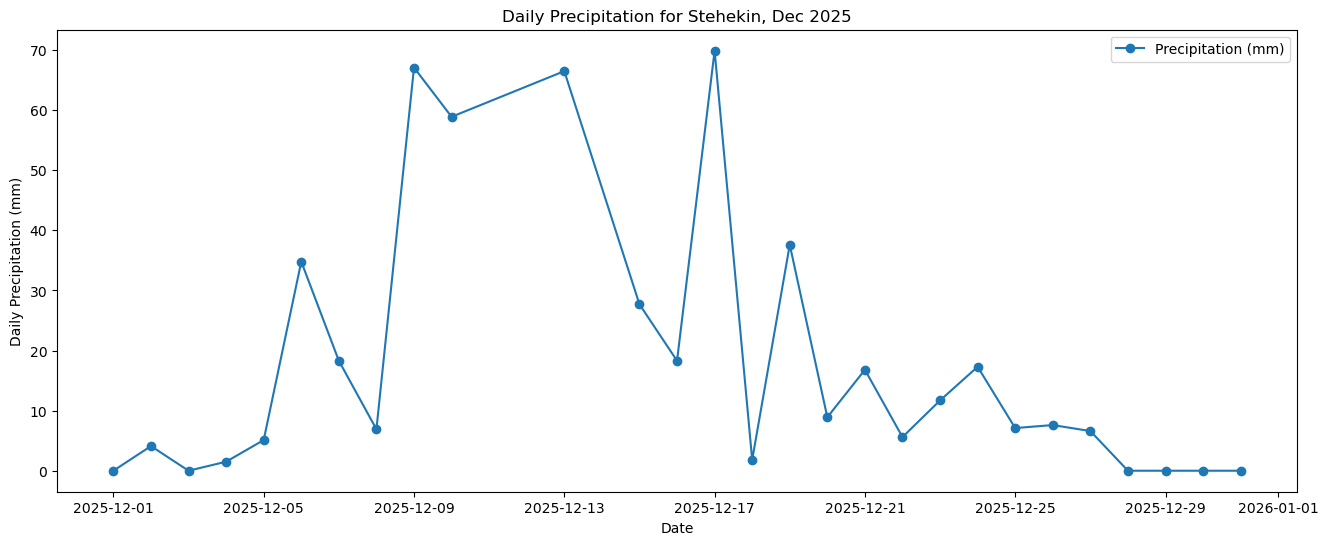

In [4]:
# graph
fig, ax = plt.subplots(figsize=(16, 6))

cleaned_df.plot(x='date', y='value', kind='line', marker='o', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Daily Precipitation (mm)')
ax.set_title('Daily Precipitation for Stehekin, Dec 2025')
ax.legend(['Precipitation (mm)'])

plt.savefig('../outputs/stehekin_precipitation.png', dpi=300)
plt.show()